# Task 1 Result Analysis: Comparing Model Predictions

## Overview

In this section, we analyze the performance of different models on Task 1, specifically focusing on the non-linear models, the Elastic Weight Consolidation (EWC) approach and hypernetworks. The comparison includes the following models:

1. **Hypernetwork**: A model trained with a hypernetwork architecture.
2. **EWC**: A model trained using Elastic Weight Consolidation to mitigate catastrophic forgetting.
3. **Baseline RNN**: A standard model trained without any continual learning techniques, used for comparison with more sophisticated approaches.

## Key Objectives

- **Model Performance Visualization**:
  - Compare the predicted outputs of different models against the true values.
  - Visualize the performance of each model over a specific segment of the dataset.

- **Analysis and Insights**:
  - Evaluate the accuracy and robustness of each model's predictions.
  - Identify any noticeable differences in the models' ability to generalize and predict the target values accurately.

## Visualization

The plot below shows the true values (black line) and the predicted values from each model (colored lines) over a specific segment of the data (indices 300 to 400). This comparison helps in understanding how closely each model's predictions align with the actual values, providing insights into the effectiveness of each approach.


### 1- Imports

In [1]:
import pandas as pd
import numpy as np
import xarray as xr

import os
import sys
from tqdm.auto import tqdm

import matplotlib.pyplot as plt
import seaborn as sns


# Navigate up two levels to reach the grandparent directory (CL Control)
parent_dir = os.path.abspath(os.path.join('..',))
sys.path.append(parent_dir)

from src.helpers import *
from src.visualize import *
from src.trainer import *
from Models.models import *

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from sklearn.metrics import *
from copy import deepcopy
import torch.utils.data as data
from torch.utils.data import Dataset

import pickle
import math

/home/nerea/anaconda3/envs/sinthlab/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import sys
sys.path.append("c:\\Users\\nerea\\OneDrive\\Documentos\\EPFL_MASTER\\PDM\\Project\\PyalData")
# to change for the actual path where PyalData has been cloned

In [3]:
from pyaldata import *

In [4]:
name = 'Chewie'
date = '1007'
fold = 0
target_variable = 'vel'

In [61]:
def set_plot_style():
    # Define the custom color palette
    custom_palette = [
        '#5F9EA0', # cadet blue
        
        '#FFD700', # gold
        '#DA70D6',   # orchid
        '#FFA07A', # light salmon
        '#87CEEB', # light blue
        '#9370DB', # medium purple
        '#98FB98'  # pale green
    ]
    
    # Set the Seaborn palette
    sns.set_palette(custom_palette)
    
    # Set general plot aesthetics
    sns.set_context("notebook", font_scale=1.2)
    sns.set_style("whitegrid")

    # Update Matplotlib rcParams for consistent styling
    plt.rcParams.update({
        'figure.figsize': (12, 7),
        'axes.titlesize': 16,
        'axes.labelsize': 14,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.title_fontsize': 13,
        'legend.fontsize': 11,
        'axes.titlepad': 20,
        'axes.labelpad': 10,
        'xtick.major.pad': 5,
        'ytick.major.pad': 5
    })

In [6]:
to_t_eval =  lambda array: torch.tensor(array, device=device, dtype=dtype)  

## Load pre-processed data

In [7]:
data_path = '../Data/Processed_Data/Tidy_'+name+'_'+date+'.pkl'

with open(data_path, 'rb') as file:
    tidy_df = pickle.load(file)

In [8]:
baseline_df = tidy_df.loc[tidy_df['epoch'] == 'BL']

In [9]:
baseline_df.id.nunique()

170

In [10]:
force_df =  tidy_df.loc[tidy_df['epoch'] == 'AD']

We need to consider only the trials for which the monkey has already adapted to the perturbation.

In [11]:
ids_to_keep = force_df.id.unique()[50:]

The baseline subset has a total of 170 trials, whereas the perturbation one contains 201 trials, we can for now try to remove the first 50 trials from the perturbation subset.

In [12]:
force_df = force_df.loc[force_df.id.isin(ids_to_keep)]

## Loading models

In [13]:
path_to_models = '../Models/Models_Force'

In [14]:
subsets = [baseline_df, force_df, tidy_df]
subsets_str = ['Baseline', 'Adaptation', 'All'] 

In [15]:
models = []
folds = []
EV = []
R2 = []
y_pred = []
y_true = []
data = []

subsets = [baseline_df, force_df, tidy_df]

for m in os.listdir(path_to_models):
    path_model = os.path.join(path_to_models,m)
    for f in os.listdir(path_model):
        fold_num = f[5]
        path_fold = os.path.join(path_model, f)  
        model = torch.load(path_fold)
        model.eval()
        for s, str_s in zip(subsets, subsets_str):
            _,_,_,_, x_test, y_test, _,_,info_test,_,_ = get_dataset(s, fold_num,
                                                                     target_variable= target_variable, 
                                                                     no_outliers = False, force_data = True)
            
            y_true_test, y_pred_test = reshape_to_eval(x_test,y_test, model)
            ev = explained_variance_score(y_true_test, y_pred_test)
            r2 = r2_score(y_true_test, y_pred_test)
            models.append(m)
            folds.append(f[:-4])
            data.append(str_s)
            EV.append(ev)
            R2.append(r2)
            y_pred.append([y_pred_test])
            y_true.append([y_true_test])

We are testing the optimization method on fold 4
We are testing the optimization method on fold 4
We are testing the optimization method on fold 4
We are testing the optimization method on fold 0
We are testing the optimization method on fold 0
We are testing the optimization method on fold 0
We are testing the optimization method on fold 1
We are testing the optimization method on fold 1
We are testing the optimization method on fold 1
We are testing the optimization method on fold 2
We are testing the optimization method on fold 2
We are testing the optimization method on fold 2
We are testing the optimization method on fold 3
We are testing the optimization method on fold 3
We are testing the optimization method on fold 3
We are testing the optimization method on fold 4
We are testing the optimization method on fold 4
We are testing the optimization method on fold 4
We are testing the optimization method on fold 0
We are testing the optimization method on fold 0
We are testing the o

In [16]:
# Create a DataFrame
results_df = pd.DataFrame({
    'Model': models,
    'Dataset': data,
    'Fold': folds,
    'EV': EV,
    'R2': R2,
    'Y_pred': y_pred,
    'Y_true': y_true
})

In [17]:
# Function to extract the desired part of the model name
def extract_model_name(name):
    if name.split('_')[-2] == 'after':
        return '_'.join(name.split('_')[-3:])
    
    name_ =  name.split('_')[-1]
    if 'hnet' in name:
        name_ = str(name_)+'_hnet'
    return(name_)

In [18]:
results_df['Model'] = results_df.Model.apply(lambda x: extract_model_name(x))

In [19]:
results_df

,Model,Dataset,Fold,EV,R2,Y_pred,Y_true
0,Baseline_hnet,Baseline,fold_4,0.884214,0.884186,"[[[-1.4765575, -3.912882], [-2.0853229, -3.706...","[[[-0.005129213, 0.011146309], [-0.39050233, -..."
1,Baseline_hnet,Adaptation,fold_4,0.581558,0.573813,"[[[0.30018425, -0.29263476], [0.6186125, 0.124...","[[[-0.55927455, -0.65708464], [-0.32793257, -0..."
2,Baseline_hnet,All,fold_4,0.718444,0.717324,"[[[-1.4508133, -4.7210255], [-0.3796625, -2.14...","[[[-0.005129213, 0.011146309], [-0.39050233, -..."
3,Baseline_hnet,Baseline,fold_0,0.860055,0.860030,"[[[1.6913636, -0.29855007], [0.09475571, -0.79...","[[[0.87900066, 0.94454104], [0.46398437, 0.702..."
4,Baseline_hnet,Adaptation,fold_0,0.632670,0.631457,"[[[1.2556036, 0.8763099], [4.223431, 1.3031183...","[[[-0.9787036, -1.2993112], [0.30494222, -0.50..."
...,...,...,...,...,...,...,...
115,Baseline,Adaptation,fold_2,0.528838,0.524481,"[[[0.38363394, -0.15016033], [0.5670341, -0.20...","[[[0.2390867, 0.25198182], [0.31185794, 0.3840..."
116,Baseline,All,fold_2,0.747303,0.746239,"[[[0.5021202, -0.23423794], [1.6779425, -0.888...","[[[0.87900066, 0.94454104], [0.46398437, 0.702..."
117,Baseline,Baseline,fold_3,0.872815,0.871818,"[[[-0.04268892, -0.35597682], [-0.38529038, -1...","[[[-0.005129213, 0.011146309], [-0.39050233, -..."
118,Baseline,Adaptation,fold_3,0.490397,0.487979,"[[[1.7948658, -0.84997827], [3.635188, -2.1312...","[[[-0.07894559, -1.1707562], [-0.28758198, -1...."


In [20]:
results_df.Model.unique()

array(['Baseline_hnet', 'Alldata', 'EWC', 'Force_hnet',
       'Force_after_Baseline', 'Baseline_after_Force', 'Force',
       'Baseline'], dtype=object)

In [21]:
results_df_filt = results_df.loc[results_df.Dataset != 'All']

In [22]:
import seaborn as sns

In [23]:
models_test_baseline = ['Baseline', 'Force_after_Baseline',
             'Baseline_after_Force','EWC',
             'Baseline_hnet', 'Alldata'] 

models_test_adaptation = ['Force', 'Force_after_Baseline',
             'Baseline_after_Force','EWC',
             'Force_hnet', 'Alldata'] 

In [24]:
results_df_baseline = results_df.loc[(results_df.Dataset == 'Baseline')& results_df.Model.isin(models_test_baseline)]
results_df_adaptation = results_df.loc[(results_df.Dataset == 'Adaptation')& results_df.Model.isin(models_test_adaptation)]

In [25]:
results_df_baseline.head(3)

,Model,Dataset,Fold,EV,R2,Y_pred,Y_true
0,Baseline_hnet,Baseline,fold_4,0.884214,0.884186,"[[[-1.4765575, -3.912882], [-2.0853229, -3.706...","[[[-0.005129213, 0.011146309], [-0.39050233, -..."
3,Baseline_hnet,Baseline,fold_0,0.860055,0.860030,"[[[1.6913636, -0.29855007], [0.09475571, -0.79...","[[[0.87900066, 0.94454104], [0.46398437, 0.702..."
6,Baseline_hnet,Baseline,fold_1,0.899942,0.899145,"[[[2.0115008, 3.5592372], [0.531531, 1.0031228...","[[[0.85819334, 0.9150491], [1.2472336, 0.89152..."


In [26]:
from matplotlib.patches import PathPatch

def adjust_box_widths(g, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

/tmp/ipykernel_217390/2690038075.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(l.get_xdata() == [xmin, xmax]):


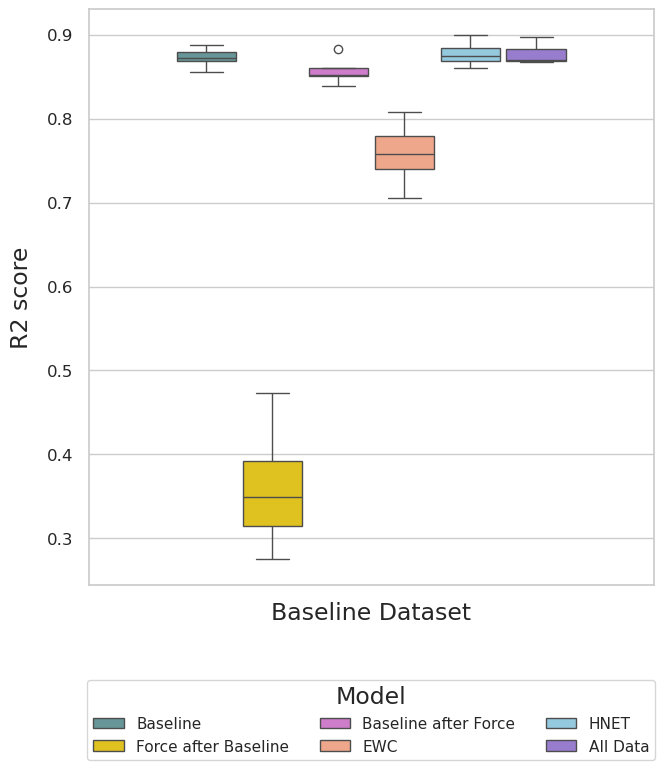

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the order of hue categories based on the order of models
# Define the original and desired legend labels
original_labels = ['Baseline', 'Force_after_Baseline', 'Baseline_after_Force', 'EWC', 'Baseline_hnet', 'Alldata']
new_labels = ['Baseline', 'Force after Baseline', 'Baseline after Force', 'EWC', 'HNET', 'All Data']



# Set style and context for better aesthetics
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.3)

# Create the boxplot
fig = plt.figure(figsize=(7, 8))  # Adjust the figure size as needed
set_plot_style()
sns.boxplot(x='Dataset', y='R2', hue='Model', data=results_df_baseline,
            hue_order=original_labels,  dodge=0.8, width=0.7)#palette=custom_palette,

# Adjust legend position
legend = plt.legend(title='Model', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, title_fontsize=17)

# Update legend labels
for t, l in zip(legend.texts, new_labels):
    t.set_text(l)
    
# Add a title and labels
plt.xticks(ticks=plt.xticks()[0], labels=['Baseline Dataset'], fontsize = 17)
plt.xlabel('')
plt.ylabel('R2 score', fontsize = 17)

# Show plot
plt.tight_layout()
adjust_box_widths(fig, 0.9)

plt.show()


/tmp/ipykernel_217390/2690038075.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(l.get_xdata() == [xmin, xmax]):


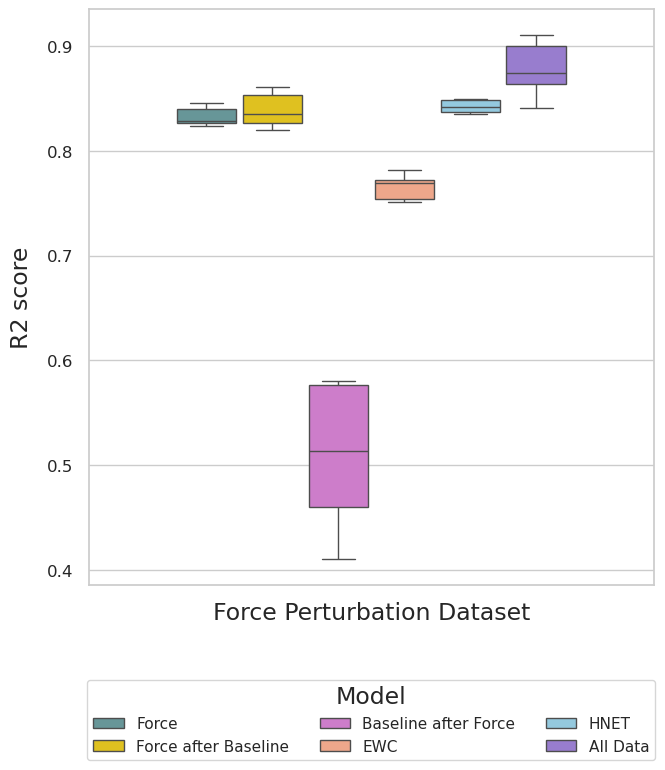

In [63]:
# Define the order of hue categories based on the order of models
# Define the order of hue categories based on the order of models
hue_order = [ 'Force','Force_after_Baseline',
             'Baseline_after_Force','EWC',
             'Force_hnet', 'Alldata']  # Add other model names in the desired order

# Define the original and desired legend labels
original_labels = ['Force', 'Force_after_Baseline', 'Baseline_after_Force', 'EWC', 'Force_hnet', 'Alldata']
new_labels = ['Force', 'Force after Baseline', 'Baseline after Force', 'EWC', 'HNET', 'All Data']


# Set style and context for better aesthetics
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.3)

# Create the boxplot for the stimulation dataset
fig = plt.figure(figsize=(7, 8))  # Adjust the figure size as needed
set_plot_style()
sns.boxplot(x='Dataset', y='R2', hue='Model', data=results_df_adaptation,
            hue_order=hue_order,  dodge=0.8, width=0.7)#palette=custom_palette,

# Adjust legend position
legend = plt.legend(title='Model', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, title_fontsize=17)

# Update legend labels
for t, l in zip(legend.texts, new_labels):
    t.set_text(l)


# Add a title and labels
#plt.title('Boxplot of R2 score by Model on Force Perturbation Dataset')
plt.xlabel('')
# Change the x-tick labels
plt.xticks(ticks=plt.xticks()[0], labels=['Force Perturbation Dataset'], fontsize = 17)
plt.ylabel('R2 score', fontsize = 17)

# Show plot
plt.tight_layout()
adjust_box_widths(fig, 0.9)

plt.show()


In [29]:
results_bas_1 = results_df_baseline.loc[results_df_baseline.Fold == 'fold_1'].reset_index()

In [30]:
results_bas_1

,index,Model,Dataset,Fold,EV,R2,Y_pred,Y_true
0,6,Baseline_hnet,Baseline,fold_1,0.899942,0.899145,"[[[2.0115008, 3.5592372], [0.531531, 1.0031228...","[[[0.85819334, 0.9150491], [1.2472336, 0.89152..."
1,21,Alldata,Baseline,fold_1,0.898226,0.897119,"[[[1.2656798, 4.5276113], [0.7282221, 2.483344...","[[[0.85819334, 0.9150491], [1.2472336, 0.89152..."
2,36,EWC,Baseline,fold_1,0.809943,0.808055,"[[[0.8763808, 1.1706231], [1.8358233, 3.409773...","[[[0.85819334, 0.9150491], [1.2472336, 0.89152..."
3,66,Force_after_Baseline,Baseline,fold_1,0.478818,0.473658,"[[[1.2593806, 1.2538391], [1.9323996, 2.719944...","[[[0.85819334, 0.9150491], [1.2472336, 0.89152..."
4,81,Baseline_after_Force,Baseline,fold_1,0.883800,0.883273,"[[[1.1237165, 4.7475905], [0.76750743, 2.35074...","[[[0.85819334, 0.9150491], [1.2472336, 0.89152..."
5,111,Baseline,Baseline,fold_1,0.888754,0.887379,"[[[0.45597076, 1.0318708], [1.0244776, 2.87486...","[[[0.85819334, 0.9150491], [1.2472336, 0.89152..."


In [31]:
len(results_bas_1['Y_pred'][0][0][:100,0])

100

In [32]:
models = results_bas_1.Model.unique()

In [33]:
models =['Baseline_hnet', 'EWC', 'Baseline']

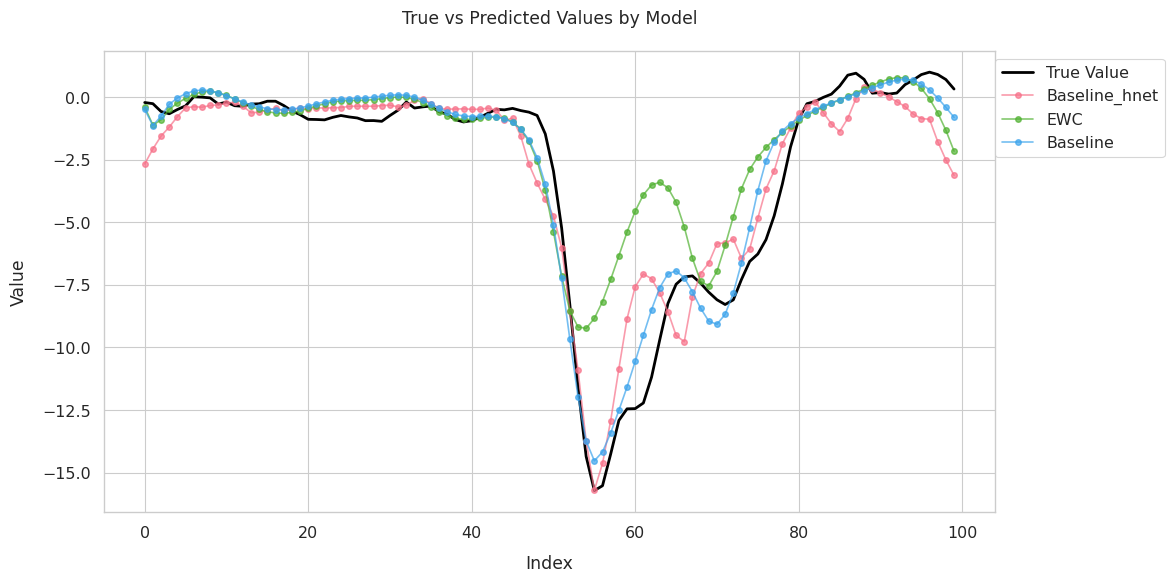

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'results_bas_1' is your DataFrame containing Model, Y_true, and Y_pred columns

# Define a color palette with enough colors for each model
palette = sns.color_palette('husl', n_colors=len(models))

plt.figure(figsize=(12, 6))

for i, m in enumerate(models):
    m_data = results_bas_1.loc[results_bas_1.Model == m]
    true = m_data['Y_true'].values[0][0][300:400, 0]  # Extract true values for plotting
    
    # Plot true values only once
    if i == 0:
        plt.plot(true, color='black', linestyle='-', label='True Value', linewidth=2)
    
    preds = m_data['Y_pred'].values[0][0][300:400, 0]  # Extract predicted values for plotting
    plt.plot(preds, label=m, linestyle='-', marker='o', markersize=4, alpha=0.7, color=palette[i])

# Customize plot
plt.title('True vs Predicted Values by Model')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.tight_layout()
plt.show()
